In [102]:
### IMPORT LIBRARIES ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

## import the dataset

In [103]:
data = pd.read_csv('../dataset/SeoulBikeData.csv', encoding='Windows-1252')
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


## drop two columns "Functioning Day" and "Dew point temperature°C"

In [104]:
data = data.drop(columns=['Functioning Day', 'Dew point temperature(°C)'])
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,01/12/2017,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday
1,01/12/2017,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday
2,01/12/2017,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday
3,01/12/2017,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday
4,01/12/2017,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday


## converting the 'Date' column to 'datetime'

In [107]:
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     8760 non-null   datetime64[ns]
 1   Rented Bike Count        8760 non-null   int64         
 2   Hour                     8760 non-null   int64         
 3   Temperature(°C)          8760 non-null   float64       
 4   Humidity(%)              8760 non-null   int64         
 5   Wind speed (m/s)         8760 non-null   float64       
 6   Visibility (10m)         8760 non-null   int64         
 7   Solar Radiation (MJ/m2)  8760 non-null   float64       
 8   Rainfall(mm)             8760 non-null   float64       
 9   Snowfall (cm)            8760 non-null   float64       
 10  Seasons                  8760 non-null   object        
 11  Holiday                  8760 non-null   object        
dtypes: datetime64[ns](1), float64(5), 

## feature engineering: Divide the date into 'weekday' and 'weekend'
## Also, we then drop the original 'Date' column

In [108]:
data['DayType'] = data['Date'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
data.drop(columns=['Date'], inplace=True)


In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   object 
 11  DayType                  8760 non-null   object 
dtypes: float64(5), int64(4), object(3)
memory usage: 821.4+ KB


## One-hot encoding for categorical features

In [110]:
data = pd.get_dummies(data, columns=['DayType','Holiday', 'Seasons'], drop_first=True)
data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),DayType_Weekend,Holiday_No Holiday,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,False,True,False,False,True
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,False,True,False,False,True
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,False,True,False,False,True
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,False,True,False,False,True
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,False,True,False,False,True


## Train and test split

In [111]:
X = data.drop('Rented Bike Count', axis=1)
y = data['Rented Bike Count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7008, 13), (1752, 13), (7008,), (1752,))

## Apply scaling and checking the dataframe shapes

In [112]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape

((7008, 13), (1752, 13))

# LINEAR REGRESSION MODEL

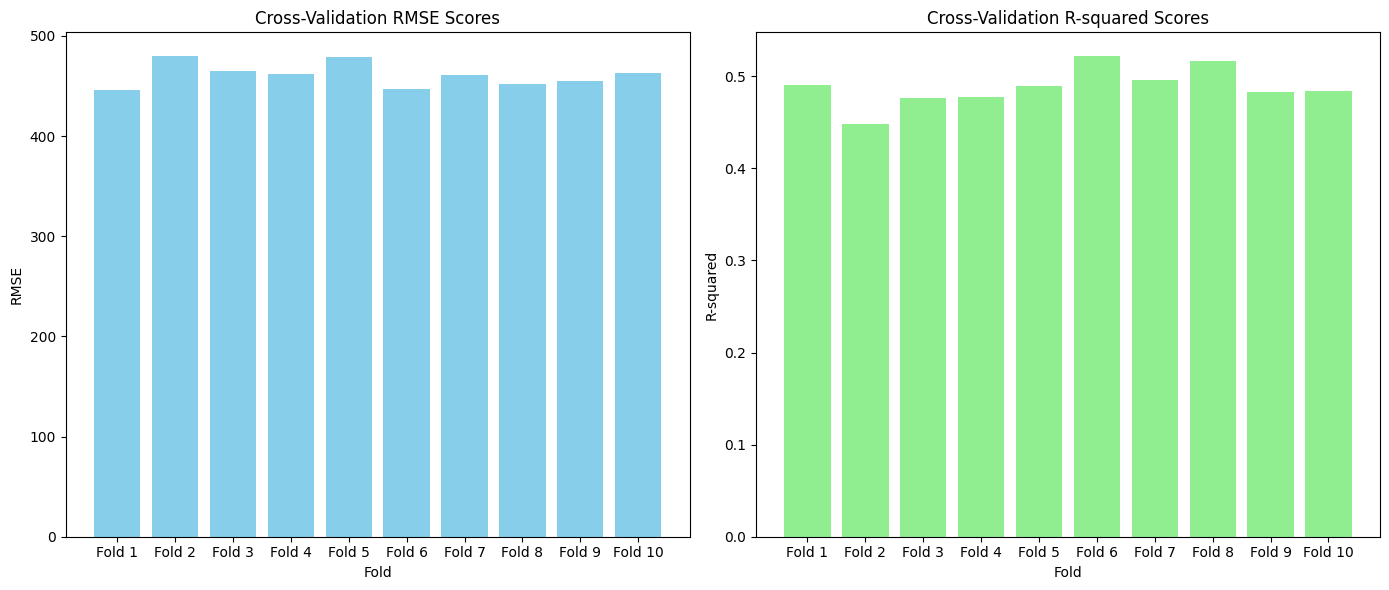

Mean CV RMSE: 460.8359657547283
Mean CV R-squared: 0.48835731580797936


In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Initialize a Linear Regression model
regressor = LinearRegression()

# Define scorers
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Perform K-Fold Cross Validation for RMSE on scaled data
cv_mse_scores = cross_val_score(regressor, X_train_scaled, y_train, cv=10, scoring=mse_scorer)
cv_rmse_scores = (-cv_mse_scores)**0.5

# Perform K-Fold Cross Validation for R-squared on scaled data
cv_r2_scores = cross_val_score(regressor, X_train_scaled, y_train, cv=10, scoring=r2_scorer)

# Plot RMSE
plt.figure(figsize=(14, 6))

# Plot RMSE
plt.subplot(1, 2, 1)
plt.bar(np.arange(len(cv_rmse_scores)), cv_rmse_scores, color='skyblue')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.title('Cross-Validation RMSE Scores')
plt.xticks(np.arange(len(cv_rmse_scores)), [f'Fold {i+1}' for i in range(len(cv_rmse_scores))])

# Plot R-squared
plt.subplot(1, 2, 2)
plt.bar(np.arange(len(cv_r2_scores)), cv_r2_scores, color='lightgreen')
plt.xlabel('Fold')
plt.ylabel('R-squared')
plt.title('Cross-Validation R-squared Scores')
plt.xticks(np.arange(len(cv_r2_scores)), [f'Fold {i+1}' for i in range(len(cv_r2_scores))])

# Show plots
plt.tight_layout()
plt.show()

# Print mean scores
print("Mean CV RMSE:", cv_rmse_scores.mean())
print("Mean CV R-squared:", cv_r2_scores.mean())


# RANDOM FOREST MODEL

Cross-validation RMSE scores: [255.01985919 266.48424064 256.80041849 260.06447546 300.70454244
 228.82727761 253.17185197 239.97183992 244.82357397 316.57726829]
Mean CV RMSE: 262.2445347963254
Cross-validation R-squared scores: [0.8333345  0.82965966 0.83989874 0.83436018 0.7989646  0.87438787
 0.84813376 0.86341563 0.85027567 0.75908665]
Mean CV R-squared: 0.8331517265238944


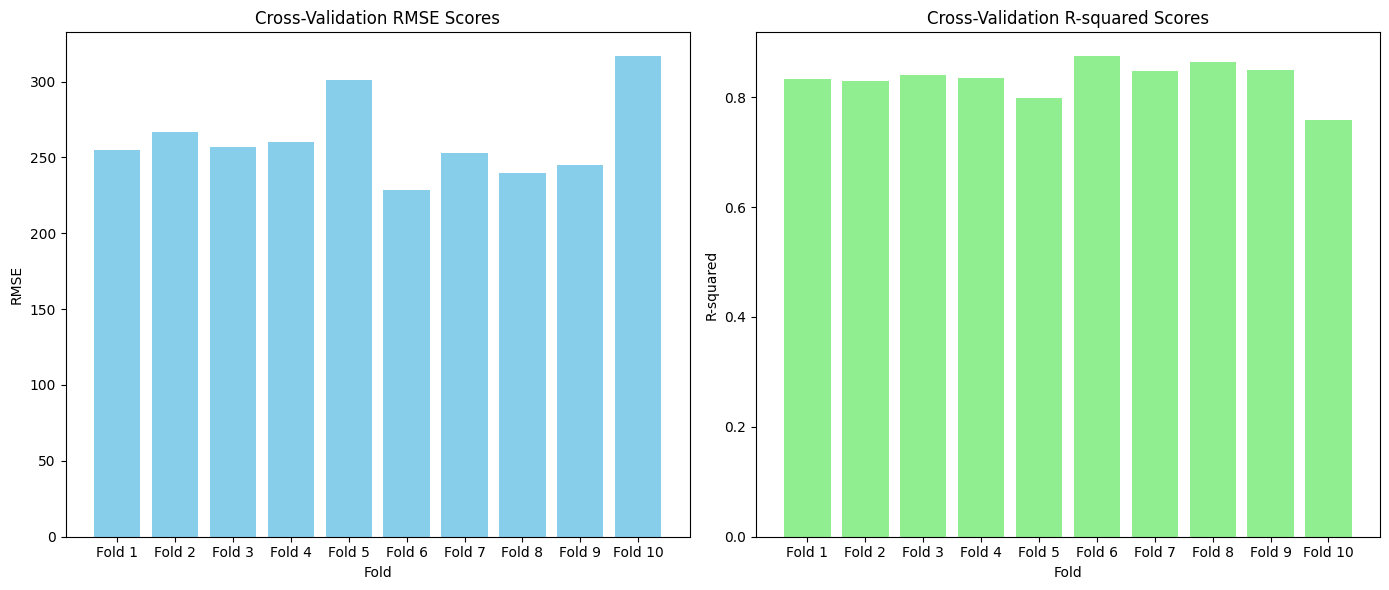

In [114]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# Initialize a Random Forest regressor
regressor = RandomForestRegressor(random_state=42)

# Define scorers
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Perform K-Fold Cross Validation for RMSE
cv_mse_scores = cross_val_score(regressor, X_train_scaled, y_train, cv=10, scoring=mse_scorer)
cv_rmse_scores = (-cv_mse_scores)**0.5

# Perform K-Fold Cross Validation for R-squared
cv_r2_scores = cross_val_score(regressor, X_train_scaled, y_train, cv=10, scoring=r2_scorer)

# Print the cross-validation scores
print("Cross-validation RMSE scores:", cv_rmse_scores)
print("Mean CV RMSE:", cv_rmse_scores.mean())
print("Cross-validation R-squared scores:", cv_r2_scores)
print("Mean CV R-squared:", cv_r2_scores.mean())

# Visualization

# Plot RMSE
plt.figure(figsize=(14, 6))

# Plot RMSE
plt.subplot(1, 2, 1)
plt.bar(np.arange(len(cv_rmse_scores)), cv_rmse_scores, color='skyblue')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.title('Cross-Validation RMSE Scores')
plt.xticks(np.arange(len(cv_rmse_scores)), [f'Fold {i+1}' for i in range(len(cv_rmse_scores))])

# Plot R-squared
plt.subplot(1, 2, 2)
plt.bar(np.arange(len(cv_r2_scores)), cv_r2_scores, color='lightgreen')
plt.xlabel('Fold')
plt.ylabel('R-squared')
plt.title('Cross-Validation R-squared Scores')
plt.xticks(np.arange(len(cv_r2_scores)), [f'Fold {i+1}' for i in range(len(cv_r2_scores))])

# Show plots
plt.tight_layout()
plt.show()

# SUPPORT VECTOR MACHINE MODEL

Cross-validation RMSE scores: [527.22599081 555.09252423 552.8690972  539.76721848 586.58975725
 543.02916414 553.17269505 543.27040139 534.13341659 546.90042813]
Mean CV RMSE: 548.2050693266225
Cross-validation R-squared scores: [0.28765344 0.26089658 0.2579248  0.28646433 0.23499986 0.2926045
 0.27497686 0.29997664 0.28733503 0.28101813]
Mean CV R-squared: 0.27638501751149175


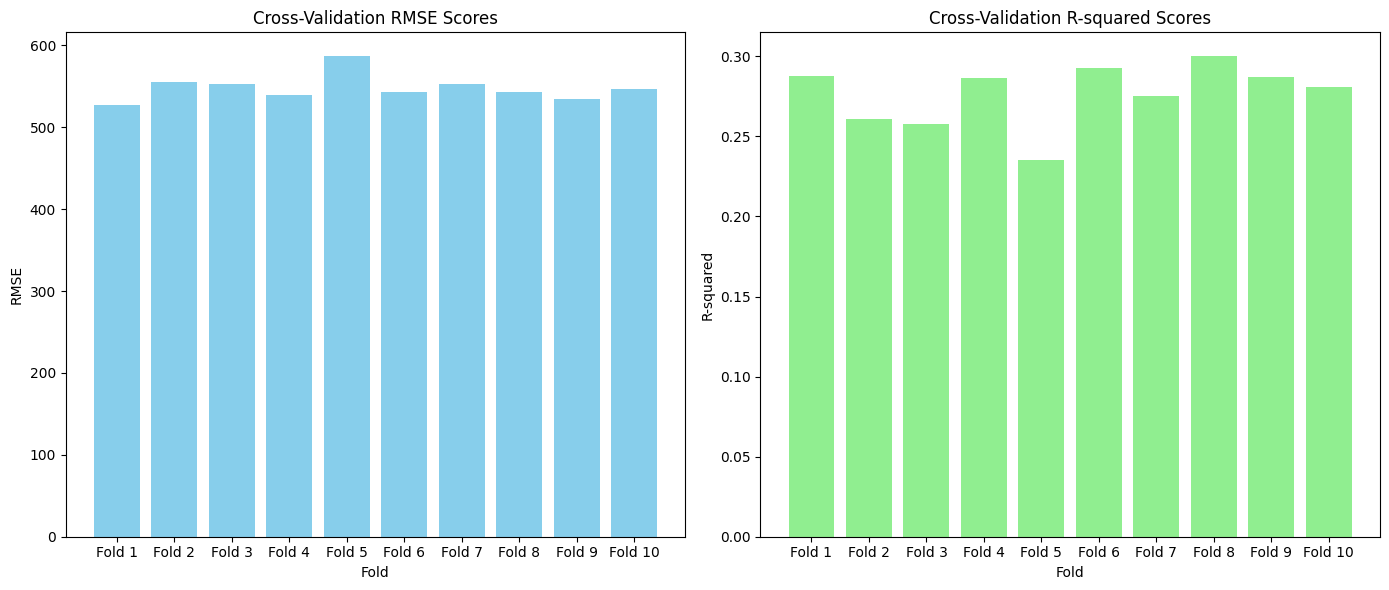

In [115]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# Initialize an SVM regressor
regressor = SVR()

# Define scorers
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Perform K-Fold Cross Validation for RMSE
cv_mse_scores = cross_val_score(regressor, X_train_scaled, y_train, cv=10, scoring=mse_scorer)
cv_rmse_scores = (-cv_mse_scores)**0.5

# Perform K-Fold Cross Validation for R-squared
cv_r2_scores = cross_val_score(regressor, X_train_scaled, y_train, cv=10, scoring=r2_scorer)

# Print the cross-validation scores
print("Cross-validation RMSE scores:", cv_rmse_scores)
print("Mean CV RMSE:", cv_rmse_scores.mean())
print("Cross-validation R-squared scores:", cv_r2_scores)
print("Mean CV R-squared:", cv_r2_scores.mean())

# Visualization

# Plot RMSE
plt.figure(figsize=(14, 6))

# Plot RMSE
plt.subplot(1, 2, 1)
plt.bar(np.arange(len(cv_rmse_scores)), cv_rmse_scores, color='skyblue')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.title('Cross-Validation RMSE Scores')
plt.xticks(np.arange(len(cv_rmse_scores)), [f'Fold {i+1}' for i in range(len(cv_rmse_scores))])

# Plot R-squared
plt.subplot(1, 2, 2)
plt.bar(np.arange(len(cv_r2_scores)), cv_r2_scores, color='lightgreen')
plt.xlabel('Fold')
plt.ylabel('R-squared')
plt.title('Cross-Validation R-squared Scores')
plt.xticks(np.arange(len(cv_r2_scores)), [f'Fold {i+1}' for i in range(len(cv_r2_scores))])

# Show plots
plt.tight_layout()
plt.show()

# XGBOOST MODEL

Cross-validation RMSE scores: [252.56576345 272.54224263 259.17942558 259.06123671 309.73552947
 236.26383622 266.91235981 260.70269552 241.68357728 318.06770989]
Mean CV RMSE: 267.6714376574205
Cross-validation R-squared scores: [0.83652676 0.82182691 0.83691864 0.83563568 0.78670798 0.86609078
 0.83120182 0.83879761 0.85409163 0.75681288]
Mean CV R-squared: 0.8264610679252851


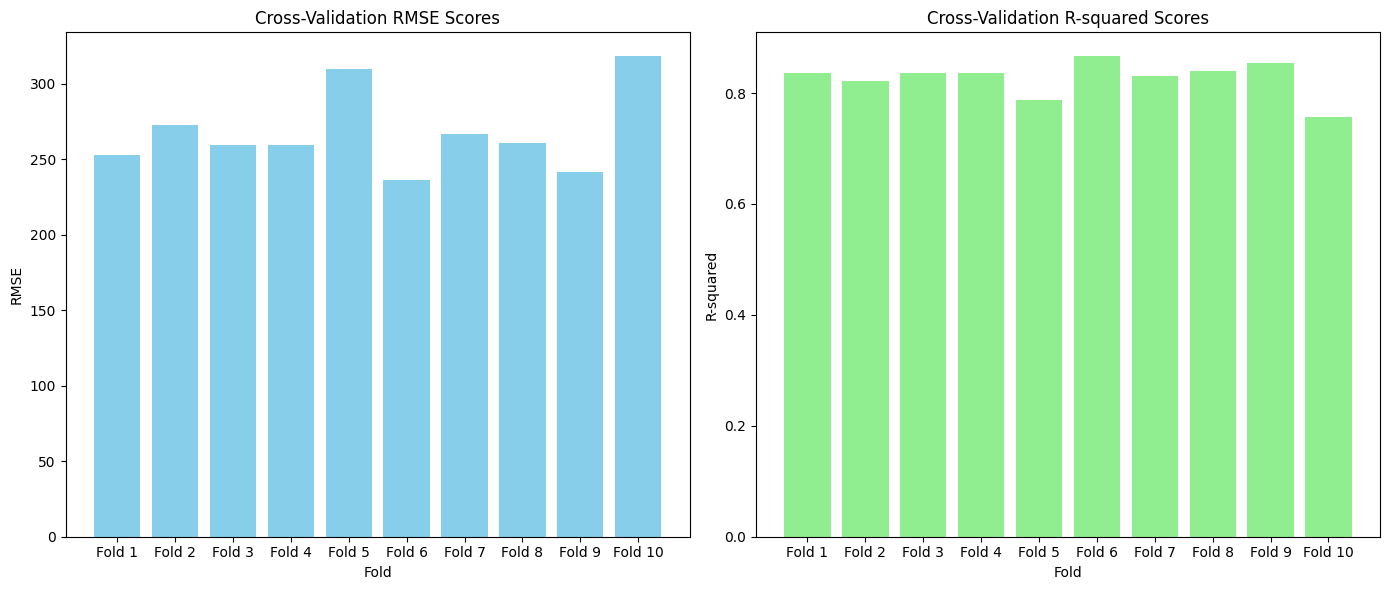

In [116]:
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# Initialize an XGBoost regressor
regressor = xgb.XGBRegressor(eval_metric='mlogloss', random_state=42)

# Define scorers
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Perform K-Fold Cross Validation for RMSE
cv_mse_scores = cross_val_score(regressor, X_train_scaled, y_train, cv=10, scoring=mse_scorer)
cv_rmse_scores = (-cv_mse_scores)**0.5

# Perform K-Fold Cross Validation for R-squared
cv_r2_scores = cross_val_score(regressor, X_train_scaled, y_train, cv=10, scoring=r2_scorer)

# Print the cross-validation scores
print("Cross-validation RMSE scores:", cv_rmse_scores)
print("Mean CV RMSE:", cv_rmse_scores.mean())
print("Cross-validation R-squared scores:", cv_r2_scores)
print("Mean CV R-squared:", cv_r2_scores.mean())

# Visualization

# Plot RMSE
plt.figure(figsize=(14, 6))

# Plot RMSE
plt.subplot(1, 2, 1)
plt.bar(np.arange(len(cv_rmse_scores)), cv_rmse_scores, color='skyblue')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.title('Cross-Validation RMSE Scores')
plt.xticks(np.arange(len(cv_rmse_scores)), [f'Fold {i+1}' for i in range(len(cv_rmse_scores))])

# Plot R-squared
plt.subplot(1, 2, 2)
plt.bar(np.arange(len(cv_r2_scores)), cv_r2_scores, color='lightgreen')
plt.xlabel('Fold')
plt.ylabel('R-squared')
plt.title('Cross-Validation R-squared Scores')
plt.xticks(np.arange(len(cv_r2_scores)), [f'Fold {i+1}' for i in range(len(cv_r2_scores))])

# Show plots
plt.tight_layout()
plt.show()

# LIGHT GBM MODEL

Cross-validation RMSE scores: [251.94233249 259.73111355 251.3533912  261.21544825 290.80084627
 230.50387269 251.54206792 237.19677777 238.66247817 318.84774853]
Mean CV RMSE: 259.1796076843463
Cross-validation R-squared scores: [0.8373328  0.83818365 0.84661857 0.83289079 0.81198872 0.87254043
 0.85008273 0.86655632 0.85771661 0.75561862]
Mean CV R-squared: 0.8369529237057609


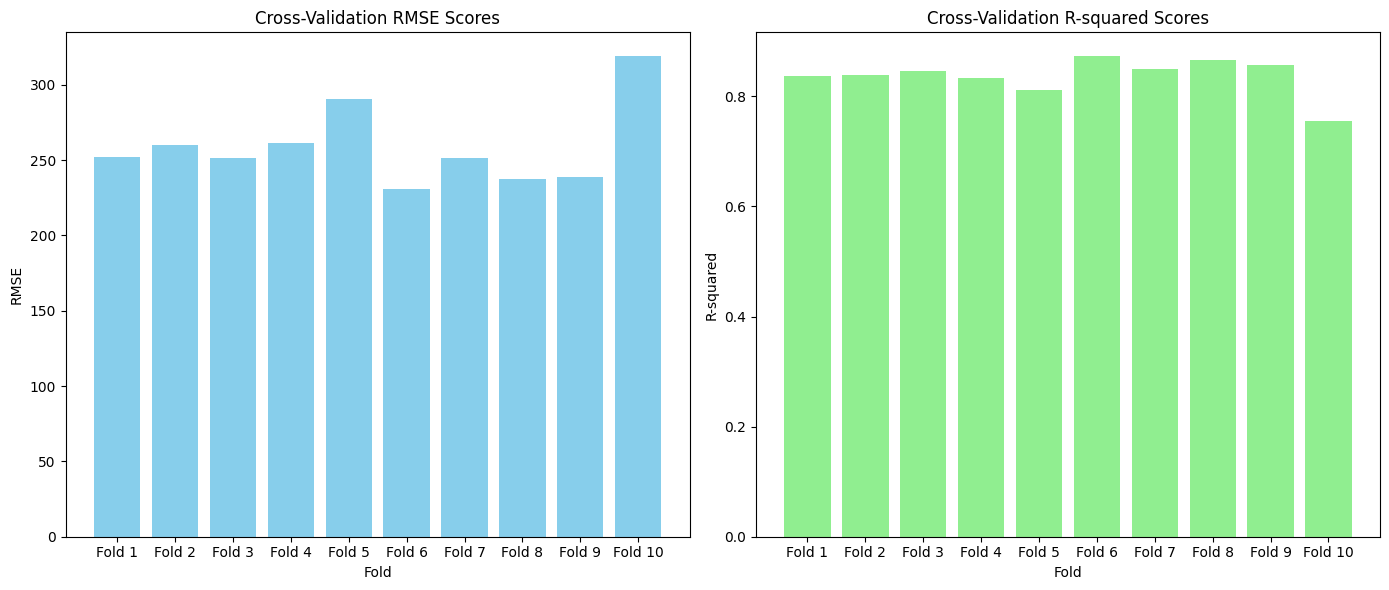

In [120]:
import matplotlib.pyplot as plt
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# Initialize a LightGBM regressor
regressor = lgb.LGBMRegressor(random_state=42, verbose=0)

# Define scorers
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Perform K-Fold Cross Validation for RMSE
cv_mse_scores = cross_val_score(regressor, X_train_scaled, y_train, cv=10, scoring=mse_scorer)
cv_rmse_scores = (-cv_mse_scores)**0.5

# Perform K-Fold Cross Validation for R-squared
cv_r2_scores = cross_val_score(regressor, X_train_scaled, y_train, cv=10, scoring=r2_scorer)

# Print the cross-validation scores
print("Cross-validation RMSE scores:", cv_rmse_scores)
print("Mean CV RMSE:", cv_rmse_scores.mean())
print("Cross-validation R-squared scores:", cv_r2_scores)
print("Mean CV R-squared:", cv_r2_scores.mean())

# Visualization

# Plot RMSE
plt.figure(figsize=(14, 6))

# Plot RMSE
plt.subplot(1, 2, 1)
plt.bar(np.arange(len(cv_rmse_scores)), cv_rmse_scores, color='skyblue')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.title('Cross-Validation RMSE Scores')
plt.xticks(np.arange(len(cv_rmse_scores)), [f'Fold {i+1}' for i in range(len(cv_rmse_scores))])

# Plot R-squared
plt.subplot(1, 2, 2)
plt.bar(np.arange(len(cv_r2_scores)), cv_r2_scores, color='lightgreen')
plt.xlabel('Fold')
plt.ylabel('R-squared')
plt.title('Cross-Validation R-squared Scores')
plt.xticks(np.arange(len(cv_r2_scores)), [f'Fold {i+1}' for i in range(len(cv_r2_scores))])

# Show plots
plt.tight_layout()
plt.show()